In [1]:
from PIL import Image, ImageDraw
import glob
import os
import shutil
from matplotlib import pyplot

In [2]:
left = 0.2
oben = 0.2
hoehe = 0.6
breite = 0.6

target_x = 20
target_y = 32

tolerance_band = 0.05


Input_dir='image_new'
Output_okay = 'output_okay'
Output_not_okay = 'output_not_okay'


(24, 32)


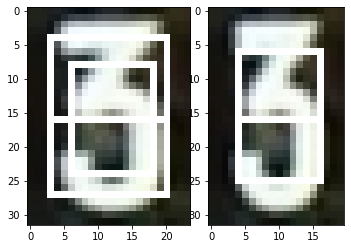

 f


(24, 31)


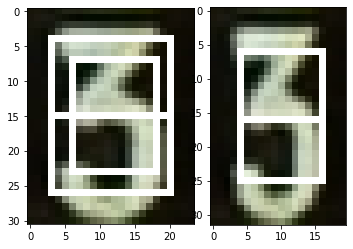

 f


(23, 31)


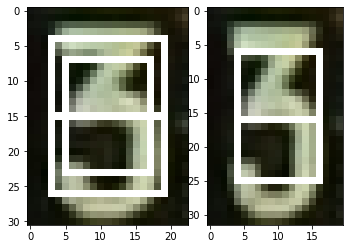

In [ ]:
files = glob.glob(Input_dir + '/*.jpg')
files = files + glob.glob(Input_dir + '/*.png')
files = files + glob.glob(Input_dir + '/*.bmp')

for aktfile in files:
#    print(aktfile)
    base = os.path.basename(aktfile)
    test_image = Image.open(aktfile)
    print(test_image.size)

    offset_x = test_image.size[0] * tolerance_band
    offset_y = test_image.size[1] * tolerance_band
    
#    fig, axs = pyplot.subplots(2, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
    fig, axs = pyplot.subplots(1, 2, gridspec_kw={'hspace': 0, 'wspace': 0})
    
    draw = ImageDraw.Draw(test_image)
#    shape = [(test_image.size[0] * left, test_image.size[1] * oben), (test_image.size[0] * (left + breite), test_image.size[1] * (oben + hoehe))]
    shape = [(test_image.size[0] * left+offset_x, test_image.size[1] * oben+offset_y), (test_image.size[0] * (left + breite)-offset_x, test_image.size[1] * (oben + hoehe)-offset_y)]
    draw.rectangle(shape, outline ="white")
    shape = [(test_image.size[0] * left-offset_x, test_image.size[1] * oben-offset_y), (test_image.size[0] * (left + breite)+offset_x, test_image.size[1] * (oben + hoehe)+offset_y)]
    draw.rectangle(shape, outline ="white")
    draw.line((test_image.size[0] * left, test_image.size[1]*0.5) + (test_image.size[0] * (left+breite), test_image.size[1]*0.5))

    axs[0].imshow(test_image)
    display(test_image)
    
    test_image = Image.open(aktfile)

    test_image = test_image.resize((target_x, target_y))
    shape = [(test_image.size[0] * left, test_image.size[1] * oben), (test_image.size[0] * (left + breite), test_image.size[1] * (oben + hoehe))]
    draw = ImageDraw.Draw(test_image)
    draw.rectangle(shape, outline ="white")
    draw.line((test_image.size[0] * left, test_image.size[1]*0.5) + (test_image.size[0] * (left+breite), test_image.size[1]*0.5))
    axs[1].imshow(test_image)
    pyplot.show()
#    display(test_image)
    
    test = input()
    if test == "a":    # Bild ist okay !!!
        shutil.move(aktfile, Output_okay + "/" +  base)
    if test == "f":             # Bild ist nicht okay !!!
        shutil.move(aktfile, Output_not_okay + "/" + base)
        
